# Seeded Poisson Factorization (SPF) example notebook

This notebook shows a minimal example of the SPF topic model.

## Preliminaries

In [ ]:
# Imports
from seededPF.SPF_model import SPF

# Example documents
documents = [
    "My smartphone's battery life is fantastic, lasts all day!",
    "The camera on my phone is incredible, takes crystal-clear photos.",
    "Love the smooth performance, but it overheats with heavy apps.",
    "This phone charges super fast, very convenient.",
    "The display is bright and vibrant, but scratches easily.",
    "Great phone, but the speaker volume is too low.",
    "My phone lags sometimes, but overall it's decent.",
    "Face unlock works instantly, super happy with it!",
    "Wish my phone had expandable storage, but still a great buy.",
    "The new update slowed my phone down, very frustrating.",
    "My laptop is super fast, perfect for multitasking.",
    "Love my PC’s performance, but the fan noise is annoying.",
    "This computer runs all my programs smoothly, no complaints!",
    "The keyboard feels great, but the battery drains fast.",
    "Amazing display, perfect for video editing!",
    "My laptop is lightweight and easy to carry everywhere.",
    "Upgraded my PC and it boots in seconds!",
    "Great for gaming, but gets hot after long sessions.",
    "My computer sometimes freezes, but a restart fixes it.",
    "Best laptop I’ve owned, powerful and reliable!"
]

# Define topic-specific seed words
smartphone = {"smartphone", "iphone", "phone", "touch", "app"}
pc = {"laptop", "keyboard", "desktop", "pc"}

keywords = {"smartphone": smartphone, "pc": pc}

## Run the SPF topic model

Fitting the SPF topic model is straightforward:
1. `SPF()`: Initialize the model.
2. `.read_docs()`: Read documents and setup the model.
3. `.model_train()`: Trains the model.

In [ ]:
# Define a custom tokenizer if needed
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english", min_df = 0)

In [ ]:
# Initialize SPF
spf = SPF(keywords = keywords, residual_topics = 0)
print(spf)

Seeded Poisson Factorization (SPF) model initialized with 2 keyword topics and 0 residual topics.


In [12]:
# Read documents
spf.read_docs(documents, count_vectorizer=cv)

NOTE: Keyword: app from topic smartphone is not in the vocabulary. Keyword dictionary will be pruned.
NOTE: Keyword: touch from topic smartphone is not in the vocabulary. Keyword dictionary will be pruned.
NOTE: Keyword: iphone from topic smartphone is not in the vocabulary. Keyword dictionary will be pruned.
NOTE: Keyword: desktop from topic pc is not in the vocabulary. Keyword dictionary will be pruned.
DTM created with: 20 documents and 85 unique words!


In [ ]:
spf.keywords # Note that the provided keywords get pruned if they do not appear in the vocabulary

{'smartphone': {'phone', 'smartphone'}, 'pc': {'keyboard', 'laptop', 'pc'}}

In [ ]:
# Train the model
spf.model_train(lr = 0.1, epochs = 150)

EPOCH: 0 -- Total loss: 968386.0 -- Reconstruction loss: -967224.5 -- Prior loss: -969244.1 -- Entropy loss: -858.1
EPOCH: 1 -- Total loss: 454668.0 -- Reconstruction loss: -453642.4 -- Prior loss: -455490.3 -- Entropy loss: -822.3
EPOCH: 2 -- Total loss: 428144.4 -- Reconstruction loss: -427274.8 -- Prior loss: -428936.2 -- Entropy loss: -791.8
EPOCH: 3 -- Total loss: 293759.2 -- Reconstruction loss: -293096.5 -- Prior loss: -294502.3 -- Entropy loss: -743.1
EPOCH: 4 -- Total loss: 263913.4 -- Reconstruction loss: -263303.5 -- Prior loss: -264639.0 -- Entropy loss: -725.6
EPOCH: 5 -- Total loss: 178660.6 -- Reconstruction loss: -178172.0 -- Prior loss: -179348.1 -- Entropy loss: -687.5
EPOCH: 6 -- Total loss: 167916.7 -- Reconstruction loss: -167420.6 -- Prior loss: -168593.7 -- Entropy loss: -676.9
EPOCH: 7 -- Total loss: 184225.8 -- Reconstruction loss: -183796.2 -- Prior loss: -184897.8 -- Entropy loss: -672.0
EPOCH: 8 -- Total loss: 117443.3 -- Reconstruction loss: -117078.8 -- Pr

## Analyze results from the SPF topic model

There are different methods available to analyze the topic model results:
- `SPF.plot_model_loss()`: Checks convergence of the negative ELBO.
- `SPF.return_topics()`: Returns a tuple (categories, E_theta), with categories being the most probable topic for each document and E_theta being the approximate posterior mean estimates per document and topic.
- `SPF.calculate_topic_word_distributions()`: Returns a pandas dataframe containing the approximate topic-term mean intensities.
- `SPF.print_topics()`: Returns a dictionary with the highest intensity words per topic.
- `SPF.plot_seeded_topic_distribution()`: Plots the variational topic word distribution of all seed words belonging to the topic parameter.
- `SPF.plot_word_distribution()`: Shows the fitted variational distribution of q(\Tilde{\beta}){topic,word} and q(\beta^*)_{topic,word}.

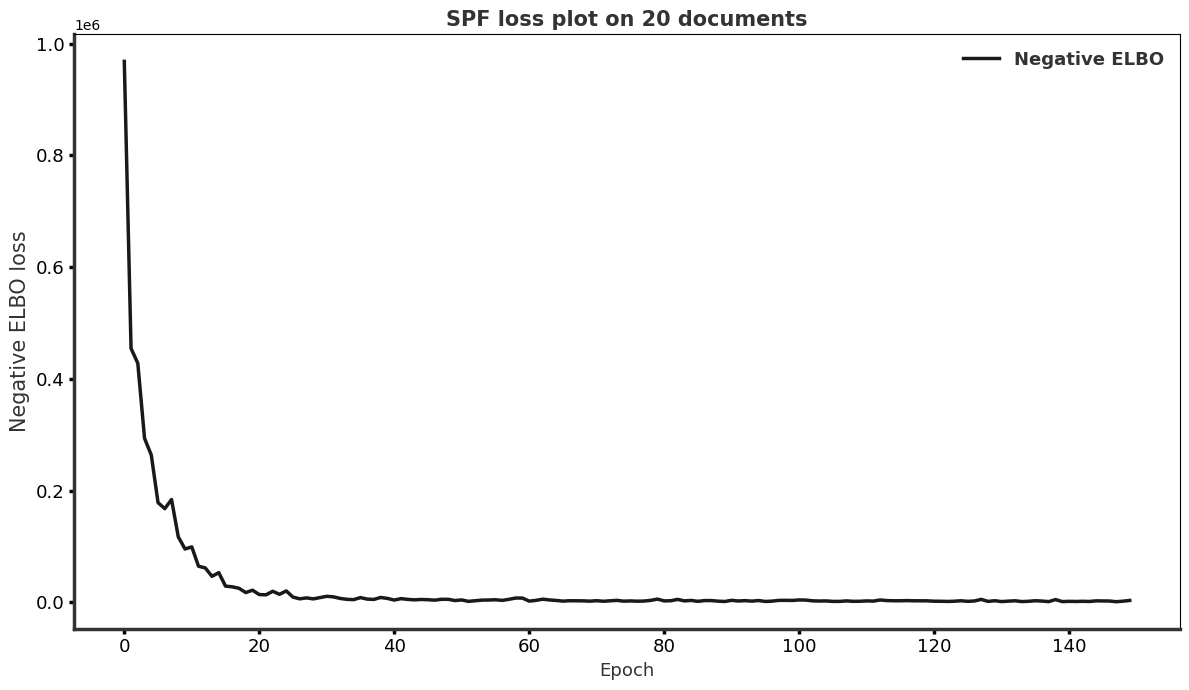

In [15]:
spf.plot_model_loss()

In [ ]:
# Return the most probable topics per document
topic_estimates, _ = spf.return_topics()
print(topic_estimates)

['smartphone', 'smartphone', 'smartphone', 'smartphone', 'smartphone', 'smartphone', 'smartphone', 'pc', 'smartphone', 'smartphone', 'pc', 'pc', 'pc', 'smartphone', 'pc', 'pc', 'smartphone', 'pc', 'pc', 'smartphone']


In [ ]:
# Show the topic-term intensities
betas = spf.calculate_topic_word_distributions()
betas.sort_values(by="smartphone", ascending = False)

,smartphone,pc
update,2.473196,1.757216
scratches,2.156635,1.345410
freezes,2.139411,1.226590
bright,2.102933,0.899475
phone,1.958131,0.918015
...,...,...
complaints,0.699415,1.470299
overall,0.666871,0.762467
great,0.642490,0.912157
easy,0.583315,1.882461


In [ ]:
# Return the most relevant words to each topic
spf.print_topics(20)

{'smartphone': ['update',
  'scratches',
  'freezes',
  'bright',
  'phone',
  'new',
  'vibrant',
  'boots',
  'charges',
  'laptop',
  'low',
  'drains',
  'runs',
  'day',
  'photos',
  'amazing',
  'performance',
  'expandable',
  'display',
  'sessions'],
 'pc': ['smooth',
  'seconds',
  'works',
  'drains',
  'charges',
  'fast',
  'easy',
  'unlock',
  'pc',
  'lags',
  'annoying',
  'update',
  'multitasking',
  'fan',
  'programs',
  'convenient',
  'complaints',
  'decent',
  'face',
  'easily']}